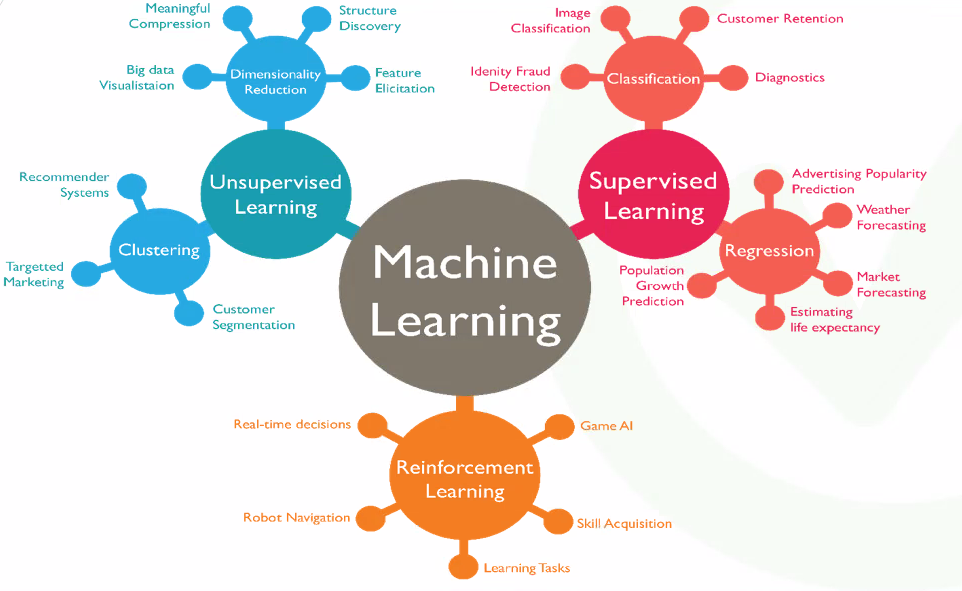

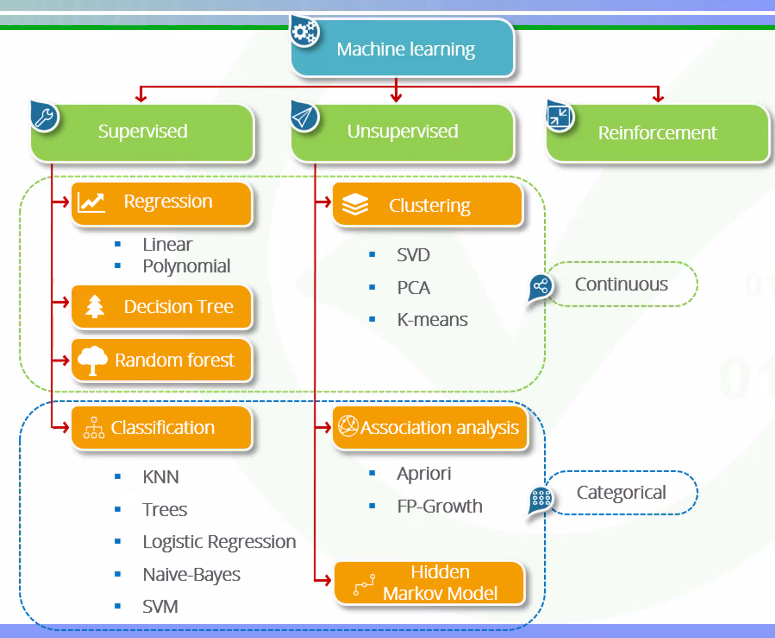

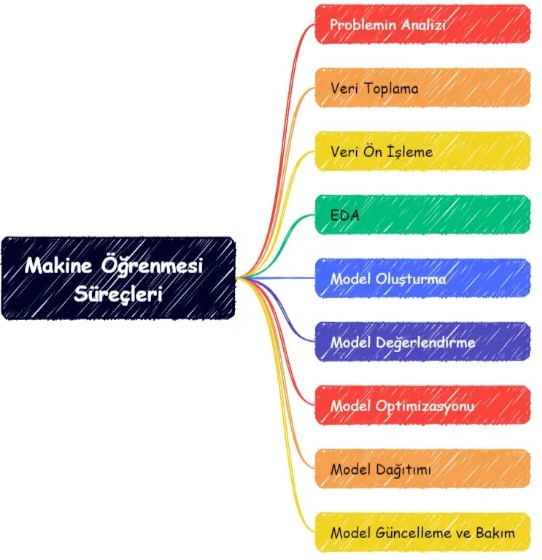

pdf i içeriye al

https://medium.com/academy-team/makine-%C3%B6%C4%9Frenmesi-s%C3%BCre%C3%A7leri-dokuz-ad%C4%B1mda-ba%C5%9Far%C4%B1ya-giden-yol-c34dab36dc26

# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6) #figure size'ı fix'lemek için kullanıyoruz.(Bütün notebooktaki görsellerin aynı boyutta olması için)
import warnings
warnings.filterwarnings('ignore') #uyarıların göz ardı edilmesi için

!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib

## Read Data Set

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


##### Genel kullanılan İSimler
* independent variables = feature = estimator = attribute = input
* dependent variables = target = label = output
* rows = observation - samples

##### Bu datada kullanacaklarımızın yerleri
* Features : TV-Radio - Newspaper
* Target : Sales

Bu veri seti, reklam harcamaları ve satışlarla ilgili veriler içeriyor.

* TV: TV reklamlarına yapılan harcamaları temsil ediyor (birim belirtilmemiş).
* Radio: Radyo reklamlarına yapılan harcamaları gösteriyor (birim belirtilmemiş).
* Newspaper: Gazete reklamlarına yapılan harcamalar (birim belirtilmemiş).
* Sales: Satış miktarlarını temsil ediyor (birim belirtilmemiş, ancak bu genellikle satış hacmini veya geliri temsil eder).

Bu veriler, reklam harcamalarının çeşitli mecralarda (TV, radyo, gazete) nasıl yapıldığını ve bu harcamaların satışlar üzerindeki etkisini incelemek için kullanılabilir.

Analizler, hangi reklam türünün satışları en çok etkilediğini veya hangi reklam kombinasyonlarının en verimli olduğunu belirlemeye yardımcı olabilir. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [14]:
df.sample(5)

,TV,radio,newspaper,sales
51,100.4,9.6,3.6,10.7
73,129.4,5.7,31.3,11.0
65,69.0,9.3,0.9,9.3
140,73.4,17.0,12.9,10.9
33,265.6,20.0,0.3,17.4


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


TV
Mean = 147
std = 85
Burada std, Mean nın yarısıdan fazla (std > (Mean/2)) değere sahip oluduğu görülüyor
bunun yorumu şu şekilde olur 
Geniş bir aralıklarda dağılım sergilediğini gösteriyor. Çok büyük değerler ve çok küçük değerler bulunuyor

Bu yorum Radio ve Newspaper için de aynı şekilde olduğu için aynı yorumu söyleyebiliriz

Radio ve Newspaper için std > (Mean/2) olduğundan  daha geniş dağılımlardaki verileri ifade ediyoralar.

%50 lik sütun bize şu yorumu yaptıracak

if mean == %50 or (mean yaklaşık %50):


    Bu normal dağılıma yakındır veya normal dağılımdır...
    TV ele alırsak 
    mean = 147
    50%=149
    bu değerler çok yakın olduğundan TV normal dağılıma yakındır diyebiliriz 

else:
    normal daağılıma o kadar uzaktır 
    

# Correlation

In [6]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


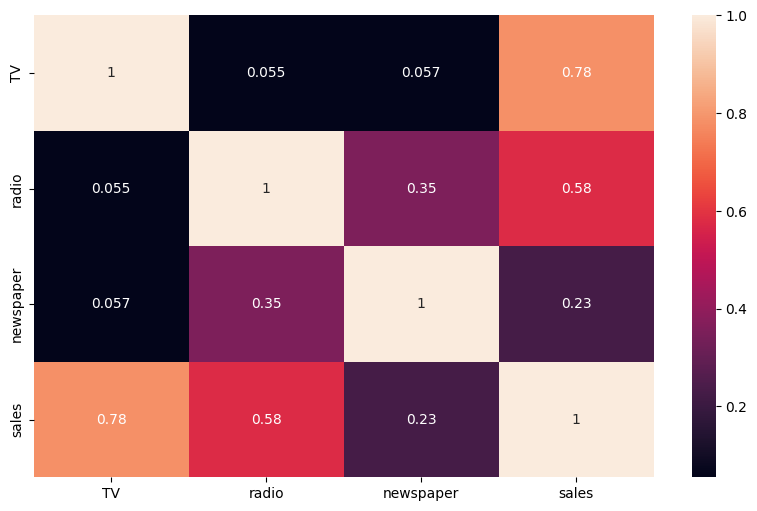

In [7]:
sns.heatmap(df.corr(), annot= True);

#### NOTLAR: 
* Multicollinearity = Featurelarin birbirleri arasındaki ilişkisi
* Korelasyon yüksekse modelin gücü de yüksek olur

Hüma Hocamın Notları: 
**Multicollinearity nedir?**

**Multicollinearity** occurs when two or more independent variables in a regression model are highly correlated with each other.

- Multicollinearity varsa featurelarin birbirileriyle iliskileri, corelasyonu fazladir.

- C ve F mesela ikisi de ayni seyi soyluyor bize. ikisi arasindaki iliski cok yuksektir.

- Biz featurelarin corelasyonlarinin kendi arasinda dusuk, target var ile cok yuksek olmasini isteriz.

- Multicollinearity durumunu istemeyiz, overfitting'e neden olur.

## Create new independent variable (yeni bir feature oluşturalım) feature engineering

In [ ]:
# total_spend = Toplam Harcama

In [8]:
df["total_spend"] = df.TV + df.radio + df.newspaper
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [9]:
df = df.iloc[:, [0,1,2,4,3]] #Sütunların yerlerini değiştirmek için kullandık
#sales sütununu en sona almak için. (RACON)
df.head()

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


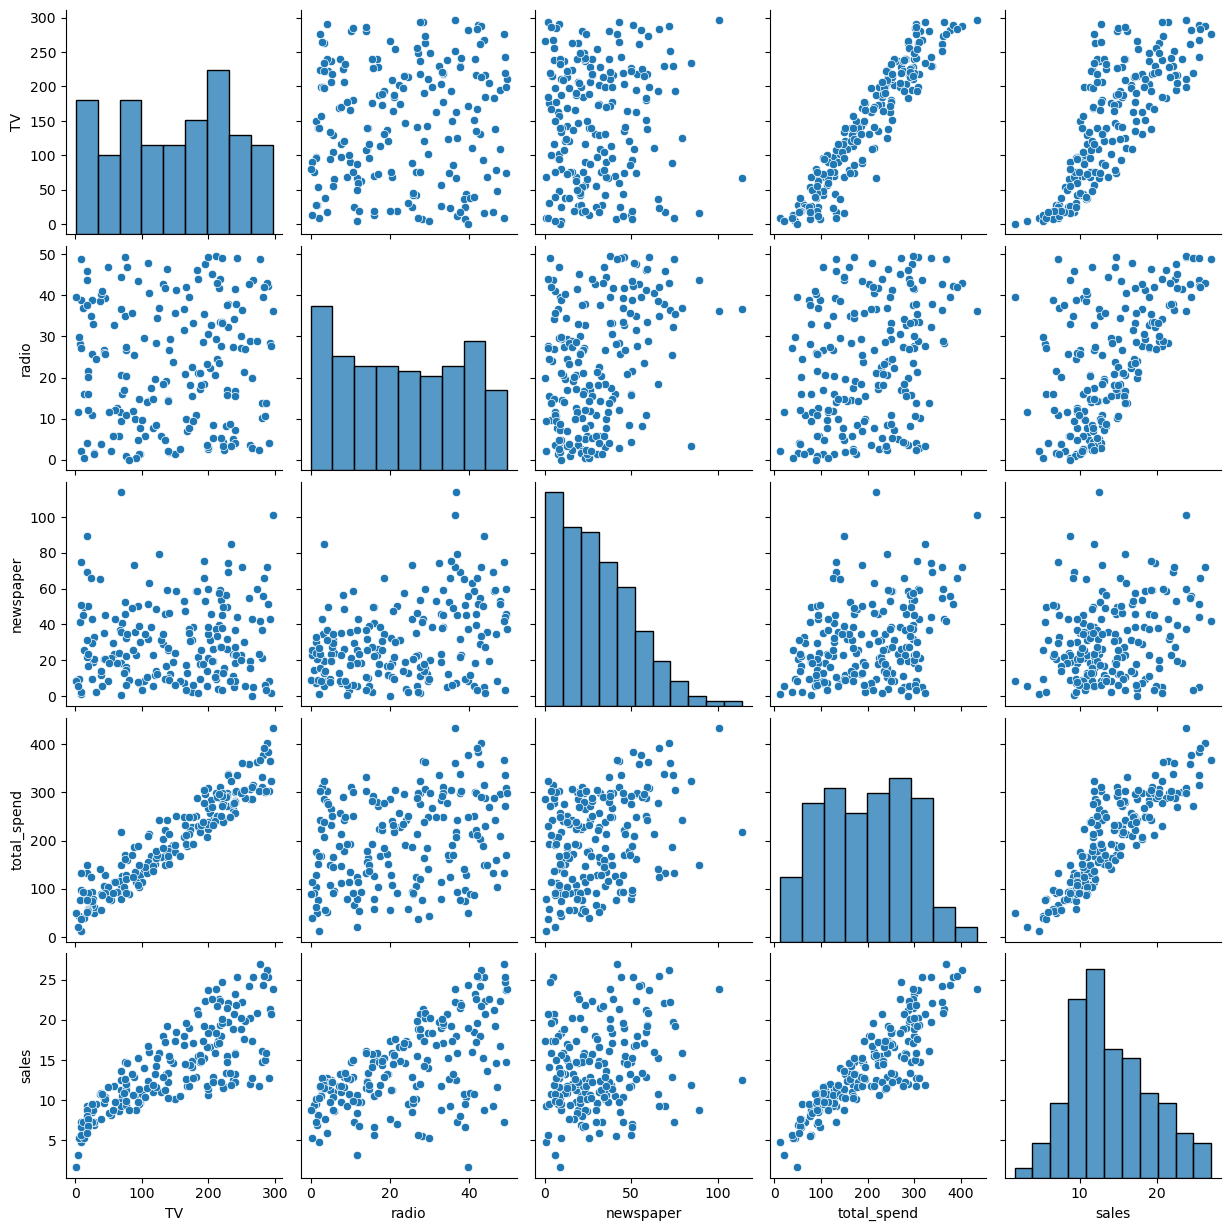

In [22]:
sns.pairplot(df);

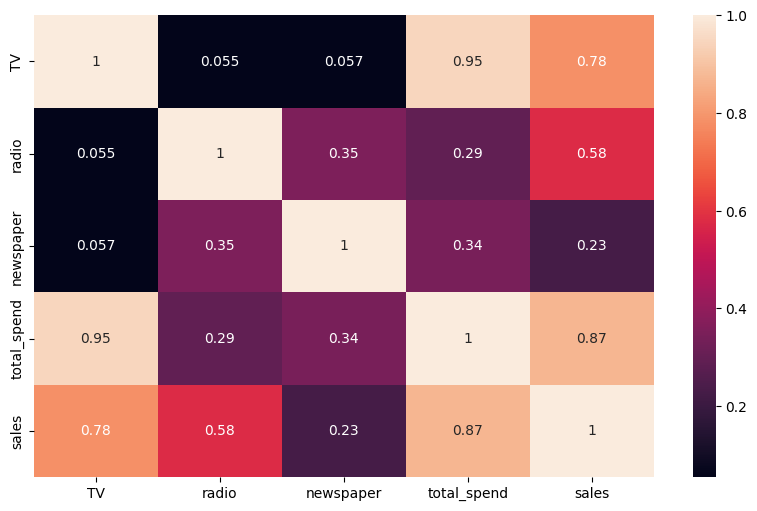

In [10]:
sns.heatmap(df.corr(), annot= True);

In [23]:
#  pip install scipy

In [3]:
import scipy.stats as stats

## Which feature is more suitable for linear regression ?

Linear Regression yapmak için hangi sütunu kullanmak daha uygun matematiksel olarak görelim 

In [4]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<12}: {df.sales.corr(df[i])}")

corr between sales and TV          : 0.7822244248616066
corr between sales and radio       : 0.5762225745710552
corr between sales and newspaper   : 0.22829902637616534


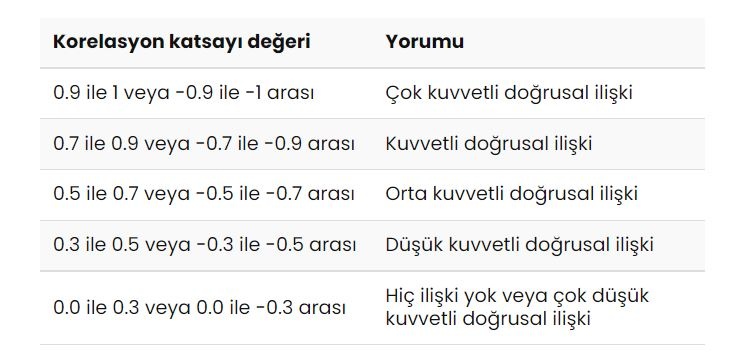

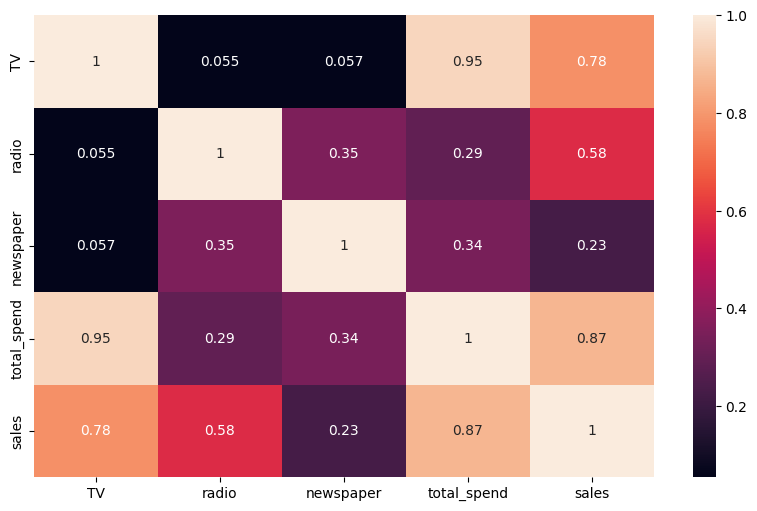

In [13]:
sns.heatmap(df.corr(), annot= True);

### Total spend e göre yeni df belirleyelim

In [6]:
df2 = df[["total_spend", "sales"]]
df2.head()

KeyError: "['total_spend'] not in index"

<Axes: xlabel='total_spend', ylabel='sales'>

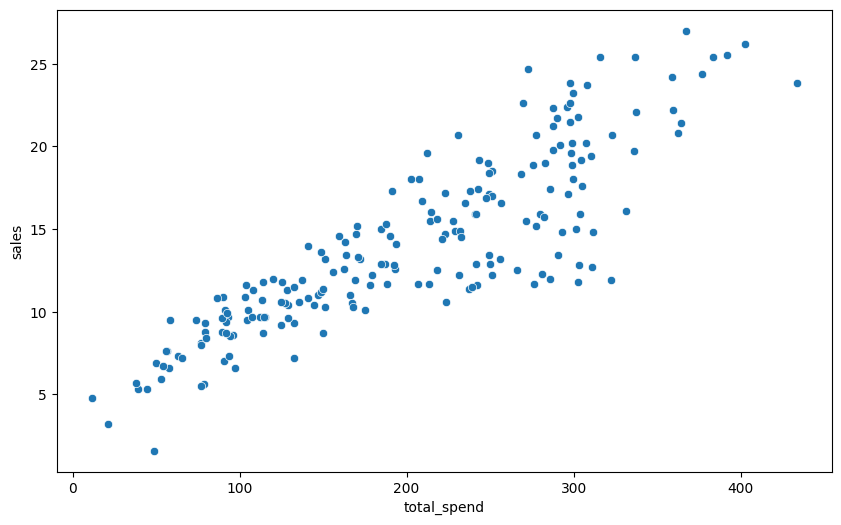

In [15]:
sns.scatterplot(x = "total_spend", y = "sales", data=df2)

### Correlation between independent variable and dependet variable

In [5]:
corr = df.sales.corr(df.total_spend)
corr

AttributeError: 'DataFrame' object has no attribute 'total_spend'

In [23]:
corr_2 = df.total_spend.corr(df.sales)
corr_2

0.8677123027017419

In [21]:
df["total_spend"].corr(df["sales"]) #Üsttekinin farklı gösterimi

0.8677123027017419

In [22]:
df["sales"].corr(df["total_spend"]) #Üsttekinin farklı gösterimi

0.8677123027017418

### Coefficant of determination (R2)

In [24]:
R2_score = corr ** 2
R2_score

0.7529246402599592

Burada ki R^2 yorumu

Elimizde ki verinin (target("sales")) %75 ini açıklıyor demektir.

# Linear Regression

## Least square Error LSE ile Line of Best fit secimi

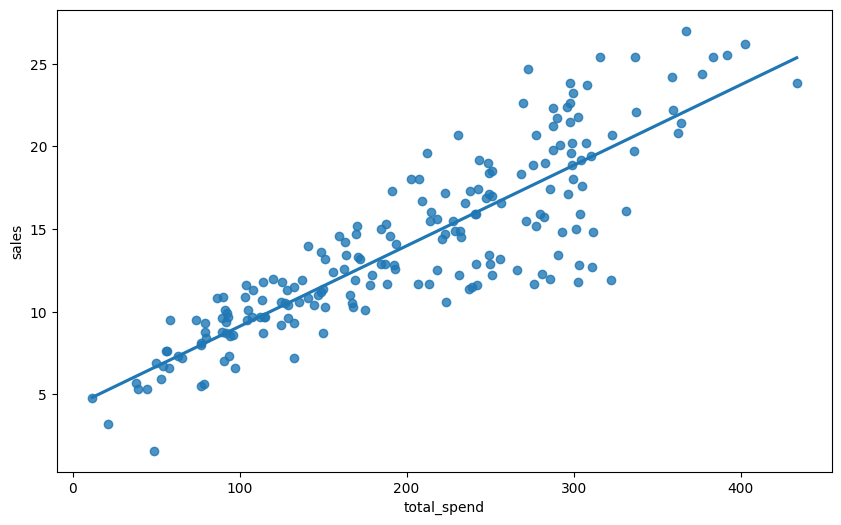

In [25]:
sns.regplot( x= "total_spend", y= "sales", data=df, ci=None);

Amaç Yukarıda ki doğru denklemini bulmak 


y=ax+b Train yaparak  "a", "b" değişkenlerini elde edeceğiz. 


doğru denklemini bulduktan sonra değişkenin (Totol_spend) değerlerini doğruda yerine yazıyoruz
gerçek değer ve doğru değerlerini  karşılaştıraçağız.


# Spliting the dataset into X(independent variables) and y(dependet variables)

y = b1 * X + b0

### y = bağımlı değişken = target variable = dependent variable
### b1 = katsayı/eğim, slope -∞ < 0 < +∞
### X = bağımsız değişken /feature, independent variable
### b0 = otonom parametre / intercept /başlangıç parametresi -∞ < 0 < +∞

Bu notebooktakilerin hepsi simple lineer

In [7]:
df.head(1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1


In [26]:
X = df["total_spend"]
y = df["sales"]

y_pred = b1X + b0


b1 = total_spend x'in katsayısı


b0 = X sıfır iken y'nin aldığı değer

In [27]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

# içine ind ve dep. variable verdiğimde ve derecesini belirttiğimde denklemin katsayılarını verecek
np.polyfit(X, y, deg=1) # sadece simple linear reg için bugünlük kullanacağız

# ustteki sonuclar için ilk deger X'in katsayıdır  - b1: slope
# 2.deger intercept değeridir - bo
# y = 0.048*X + 4.243





9:40
# içine ind. ve dep. variable verdiğimde ve derecesini belirttiğimde denklemin katsayılarını verecek
np.polyfit(X, y, deg=1)   # sadece simle linear reg. için bugunlük kullanacağız

### 4.1 Determination  of coefficients

In [28]:
slope, intercept = np.polyfit(X, y, deg=1)

In [30]:
print("slope     :", slope)
print("intercept :", intercept)

slope     : 0.048687879319048145
intercept : 4.2430282160363255


In [31]:
b1, b0 = np.polyfit(X, y, deg = 1)

print("b1 :", b1)
print("b0 :", b0)

b1 : 0.048687879319048145
b0 : 4.2430282160363255


In [32]:
# y_pred i formalize edelim
y_pred = b1*X + b0

In [33]:
y_pred

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: total_spend, Length: 200, dtype: float64

actual                 = y               = gerçek değer


predicted              = y_pred          = tahmin değeri


residual               = y - y_pred      = gerçek değer ve tahmin edilen arasındaki fark (error'ler)


LSE (Least Square Eror) = (y - y_pred)^2  = gerçek değer ve tahmin edilen arasındaki farkın karesi=En küçük kareler yöntemi

In [34]:
values = {"actual": y, "predicted": y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [35]:
df_2.residual.sum().round()

0.0

In [36]:
df_2.LSE

0       2.085967
1       0.014136
2       1.930164
3       4.087302
4      12.355211
         ...    
195     0.416098
196     0.056469
197     0.680926
198     4.757026
199     8.914914
Name: LSE, Length: 200, dtype: float64

In [39]:
df_2.LSE.sum()

1338.4439761715594

## 5.0 Prediction with simple linear regrassion

In [40]:
# X = potansiyel harcamaları ifade etsin
# y_pred = b1X + b0

In [41]:
potential_spend = np.linspace(0,500,100)
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [42]:
predicted_sales_lin = b1*potential_spend + b0
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

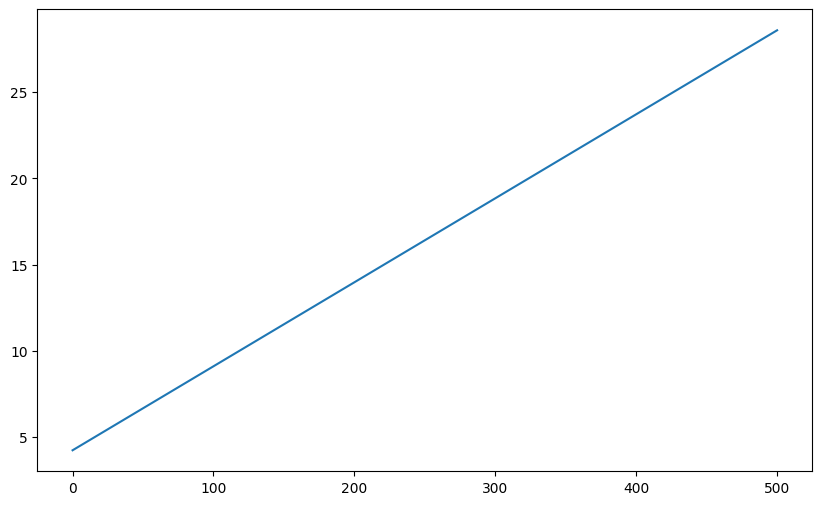

In [46]:
plt.plot(potential_spend, predicted_sales_lin)


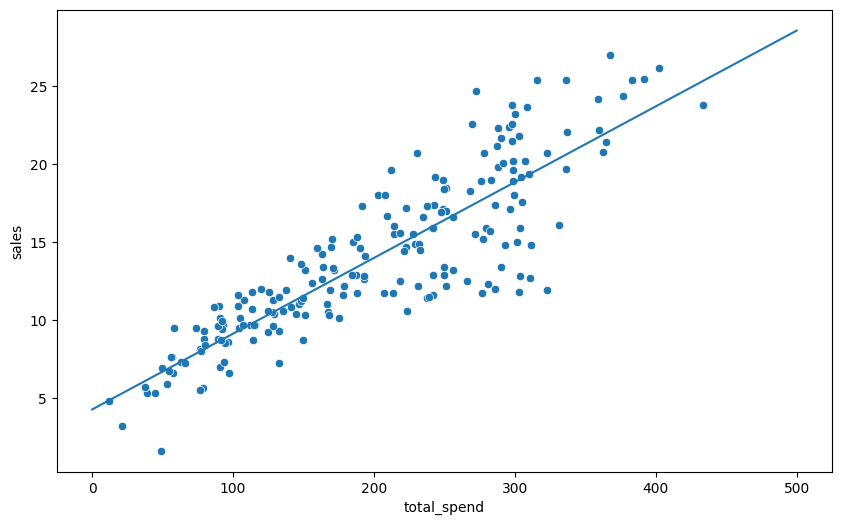

In [47]:
plt.plot(potential_spend, predicted_sales_lin)
sns.scatterplot(x="total_spend", y="sales", data=df);

y = b1 * x + b0  => simple linear


y = a1 * x**3 + a2 * x**2 + a3*x + a0 => 3 degree polinominal

In [55]:
a = np.polyfit(X, y, deg=3)
a

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [58]:
a1 = np.polyfit(X, y, deg=3)[0]
a2 = np.polyfit(X, y, deg=3)[1]
a3 = np.polyfit(X, y, deg=3)[2]
a0 = np.polyfit(X, y, deg=3)[3]

In [60]:
# polynom fonksiyon icin tahminleri olusturalim

predicted_sales_poly = a1*potential_spend**3 + a2*potential_spend**2 + a3*potential_spend + a0  

In [61]:
predicted_sales_poly

array([ 2.70495053,  3.11474825,  3.51512185,  3.90630911,  4.28854779,
        4.66207567,  5.02713052,  5.38395012,  5.73277224,  6.07383465,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107317,
        7.97057058,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998502,
        9.3813837 ,  9.64787595,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506287, 11.15710981, 11.39591473, 11.63171541,
       11.86474962, 12.09525514, 12.32346974, 12.5496312 , 12.77397728,
       12.99674577, 13.21817442, 13.43850103, 13.65796336, 13.87679918,
       14.09524627, 14.3135424 , 14.53192534, 14.75063288, 14.96990277,
       15.1899728 , 15.41108073, 15.63346435, 15.85736142, 16.08300973,
       16.31064703, 16.54051111, 16.77283973, 17.00787068, 17.24584172,
       17.48699063, 17.73155518, 17.97977315, 18.23188231, 18.48812043,
       18.74872528, 19.01393464, 19.28398629, 19.55911799, 19.83956752,
       20.12557265, 20.41737116, 20.71520081, 21.01929939, 21.32

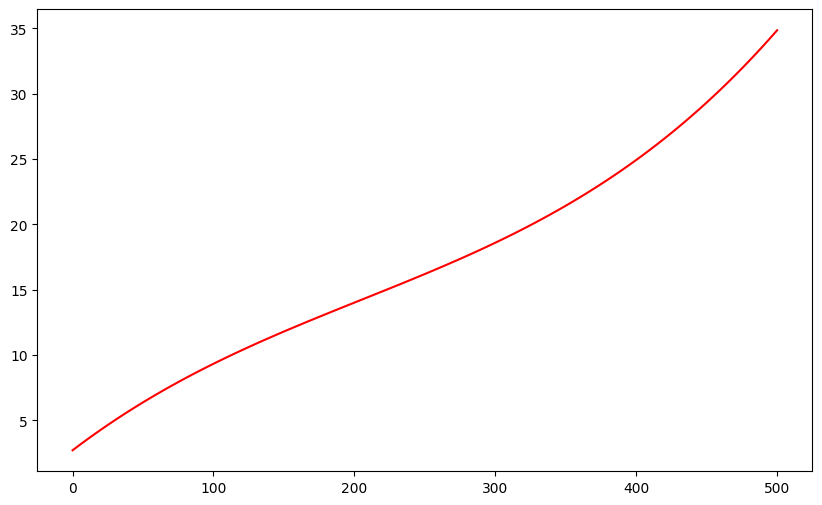

In [62]:
plt.plot(potential_spend, predicted_sales_poly, color="red");

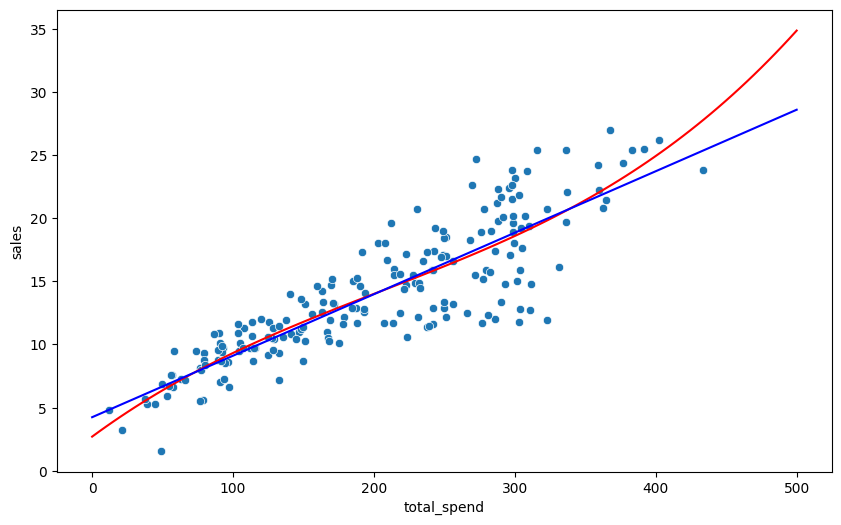

In [64]:
plt.plot(potential_spend, predicted_sales_poly, color = "red")
plt.plot(potential_spend, predicted_sales_lin, color = "blue")
sns.scatterplot(x ="total_spend", y = "sales", data = df);

In [63]:
spend = 400
sales_pred_lin = b1 * spend + b0
sales_pred_poly = a1*spend**3 + a2*spend**2 + a3*spend + a0

print(sales_pred_lin, sales_pred_poly)

23.718179943655585 24.924972837670698
